In [ ]:
Stock Prediction

In [ ]:
import pandas as pd
import numpy as np
import os
df = pd.read_excel('stock2018-2023.xlsx')
print(df.head())

           Date      Open      High       Low    Close*  Adj Close**  \
0  Apr 28, 2023  33797.43  34104.56  33728.40  34098.16     34098.16   
1  Apr 27, 2023  33381.66  33859.75  33374.65  33826.16     33826.16   
2  Apr 26, 2023  33596.34  33645.83  33235.85  33301.87     33301.87   
3  Apr 25, 2023  33828.34  33875.49  33525.39  33530.83     33530.83   
4  Apr 24, 2023  33805.04  33891.15  33726.09  33875.40     33875.40   

      Volume  
0  354310000  
1  343240000  
2  321170000  
3  297880000  
4  252020000  


In [ ]:
print(df.isnull().sum())

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64


In [ ]:
print(df.dtypes)

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
Volume                  int64
dtype: object


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1258 non-null   datetime64[ns]
 1   Open         1258 non-null   float64       
 2   High         1258 non-null   float64       
 3   Low          1258 non-null   float64       
 4   Close*       1258 non-null   float64       
 5   Adj Close**  1258 non-null   float64       
 6   Volume       1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close*'], color='red')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [ ]:
column_names = df.columns
column_names

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

df=pd.read_excel('stock2018-2023.xlsx')
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df[['Open', 'High', 'Low', 'Adj Close**', 'Volume', 'Close*']])

In [ ]:
X = scaled_df[:, :-1]
y = scaled_df[:, -1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=5, batch_size=64)

loss = model.evaluate(X_test, y_test)

predictions = model.predict(X_test)

r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

predictions = predictions.reshape(-1, 1)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0014
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7508e-04
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0351e-04
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3899e-04
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7770e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8664e-04  
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
R-squared: 0.9958835574024006


In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.00026917796763343394
Root Mean Squared Error (RMSE): 0.016406644008859154


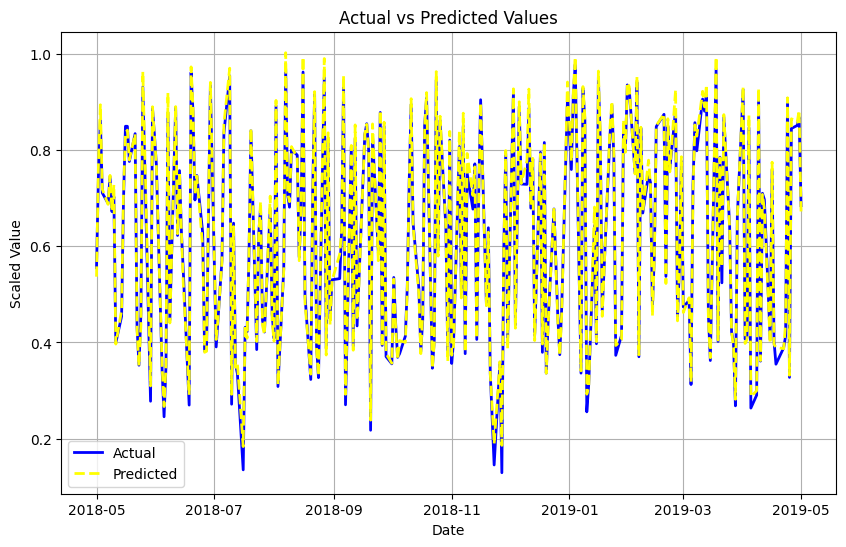

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][len(X_train):], y_test, label='Actual', color='blue', linewidth=2)
plt.plot(df['Date'][len(X_train):], predictions, label='Predicted', color='yellow', linewidth=2, linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
user_input = []
features = ['Open', 'High', 'Low', 'Adj Close**', 'Volume','close*']
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    user_input.append(value)
user_input_scaled = scaler.transform([user_input])
user_input_reshaped = user_input_scaled.reshape(1, user_input_scaled.shape[1], 1)
prediction = model.predict(user_input_scaled)

predicted_price = scaler.inverse_transform([[0, 0, 0, 0, 0, prediction[0][0]]])[-1][-1]
print(f"Predicted Closing Price: {predicted_price}")

Enter the value for Open: 4
Enter the value for High: 3
Enter the value for Low: 4
Enter the value for Adj Close**: 5
Enter the value for Volume: 4
Enter the value for close*: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Closing Price: 7510.333564295769


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
